**Autor:** Andrej Gajdoš  <br> 
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br> 
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
*** 

**_Tento materiál vznikol za podpory grantu VVGS-2022-2412._**

***

**<font size=6 color=gold> Introduction to Matplotlib</font>**  

<a id=table_of_contents></a>
###  Table of Contents 


* [What is Matplotlib?](#matplotlib) - a brief description of Matplotlib


* [Settings](#settings) - several settings for matplotlib when working with Jupyter notebook 


* [Plotting in 2D](#plotting_2d) - simple plot, multiple curves in the same plot, array of plots, customized linestyles, polar plot, (filled) contour plot 


* [Plotting in 3D](#plotting_3d) - plots of surfaces, 3D curve 


* [Procedural vs object oriented plotting](#proc_oop) - two ways of plotting


* [References](#references)


**To get back to the contents, use <font color=brown>the Home key</font>.**

***
<a id=matplotlib></a>
# <font color=brown> What is Matplotlib?</font>

The most common facility for plotting with the Python numerical suite is to use the *matplotlib* package.  We will cover a few of the basic approaches to plotting figures.  If you are interested in learning more about *matplotlib* or if you are looking to see how you might create a particular plot check out the matplotlib [gallery](http://matplotlib.org/gallery) for inspiration.

***
<a id=settings></a>
# <font color=brown> Settings</font>

We import *matplotlib* along with *numpy*. Numpy will be used extensively in many of the examples that follow.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

`matplotlib.pyplot` is a collection of command style functions that make *matplotlib* work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

When working in Jupyter notebook, we also need to tell *matplotlib* which graphics backend to use. We do this with the line magic as follows. The most common backends are 'inline' for non-interactive plotting, and 'notebook' for interactive plotting.

In [2]:
# uncomment the following line to use the notebook backend
%matplotlib notebook

# uncomment the following line to use the inline backend
#%matplotlib inline
### NOTE: savefig() does not currently appear to work with inline backend 

There are many others backends available to choose from (gtk, tk, qt, ...). Experiment to find the one that works best for your purposes. (NOTE: changing the graphics backend usually requires restarting the kernel.) You can list the available backends using the following line magic command.

In [3]:
# list available backends
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


We will also create an auxiliary directory, which is where output files will be saved to.

In [4]:
# create auxiliary directory
import os
folder = 'matplotlib_files'
if not os.path.exists(folder):
    os.mkdir(folder)

***
<a id=plotting_2d></a>
# <font color=brown> Plotting in 2D</font>

### Simple plot

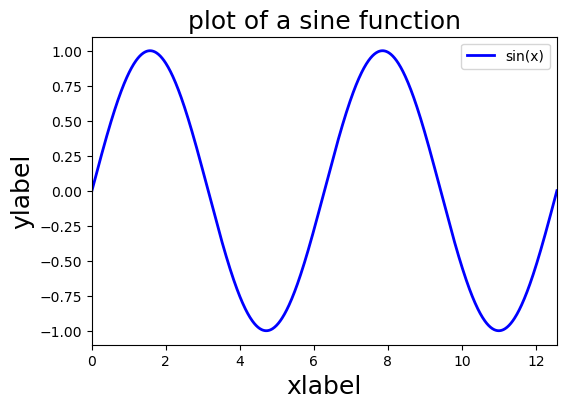

In [5]:
# create x grid
xmin = 0
xmax = 4*np.pi
xsteps = 1001
x = np.linspace(xmin, xmax, xsteps)

# define a function (dependent variable)
y = np.sin(x)

# plot functions
plt.figure(figsize=(6,4))
plt.plot(x, y, 'b-', linewidth=2, label='sin(x)')
plt.xlim(xmin, xmax)
plt.title('plot of a sine function', fontsize=18)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.legend()

# save to file
# file = 'sine.eps'
# plt.savefig(folder + '/' + file)

### Multiple curves in the same plot

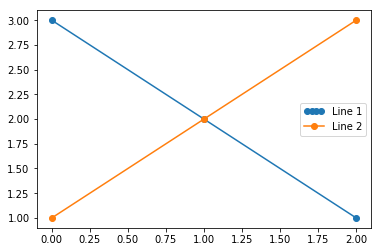

In [23]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot([3, 2, 1], marker='o', label='Line 1')
line2, = plt.plot([1, 2, 3], marker='o', label='Line 2')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

<IPython.core.display.Javascript object>


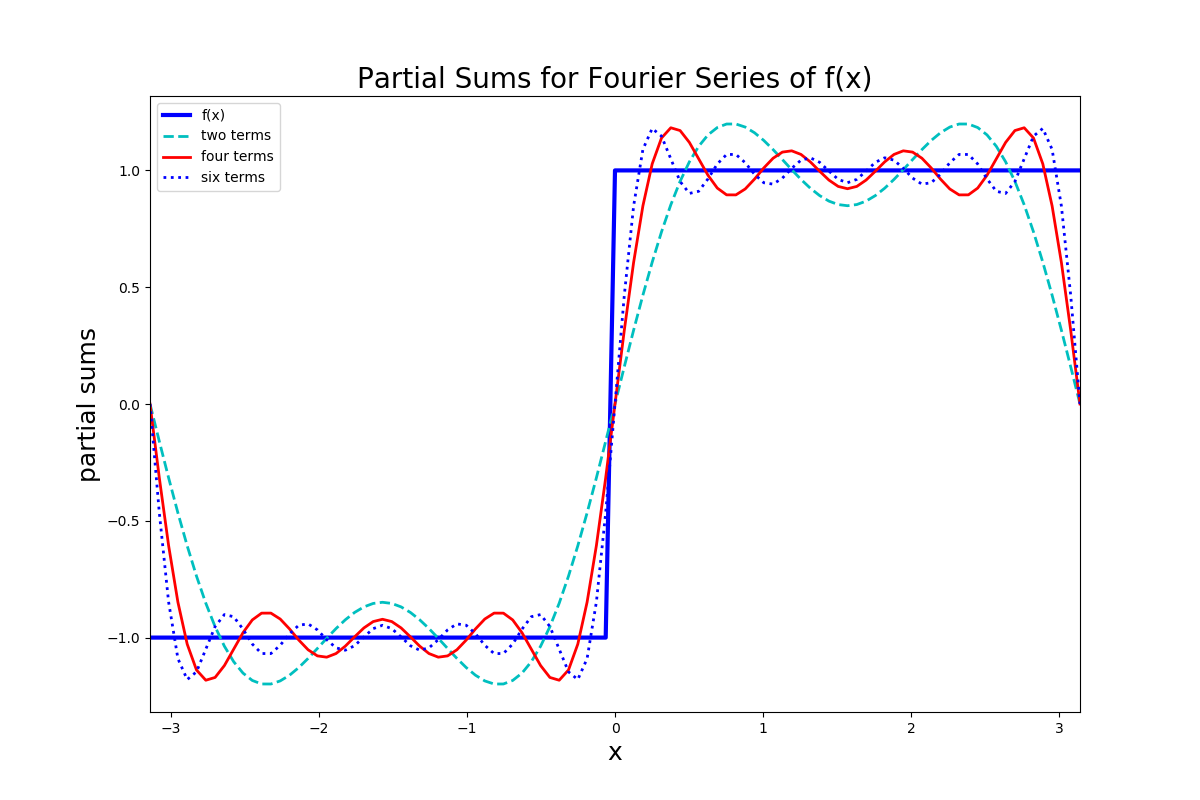

In [6]:
# create xgrid
xmin = -np.pi
xmax = np.pi
xsteps = 101
x = np.linspace(xmin, xmax, 101)

# define a simple step function
f = np.ones_like(x) #initial array of ones, same size as x
f[x<0] = -1         #set values for x<0 to be -1 

# construct partial sums in Fourier sine series
y1 = (4/np.pi)*(np.sin(x) + np.sin(3*x)/3.0)
y2 = y1 + (4/np.pi)*(np.sin(5*x)/5.0 + np.sin(7*x)/7.0)
y3 = y2 + (4/np.pi)*(np.sin(9*x)/9.0 + np.sin(11*x)/11.0)

# plot multiple curves on a single figure
plt.figure(figsize=(12,8))
plt.plot(x, f, 'b-', lw=3, label='f(x)')
plt.plot(x, y1, 'c--', lw=2, label='two terms')
plt.plot(x, y2, 'r-', lw=2, label='four terms')
plt.plot(x, y3, 'b:', lw=2, label='six terms')
plt.xlim(xmin, xmax)
plt.xlabel('x', fontsize=18)
plt.ylabel('partial sums', fontsize=18)
plt.title('Partial Sums for Fourier Series of f(x)', fontsize=20)
plt.legend(loc='best')

# save to file
file = 'multicurve.eps'
plt.savefig(folder + '/' + file)

### An array of plots

<IPython.core.display.Javascript object>


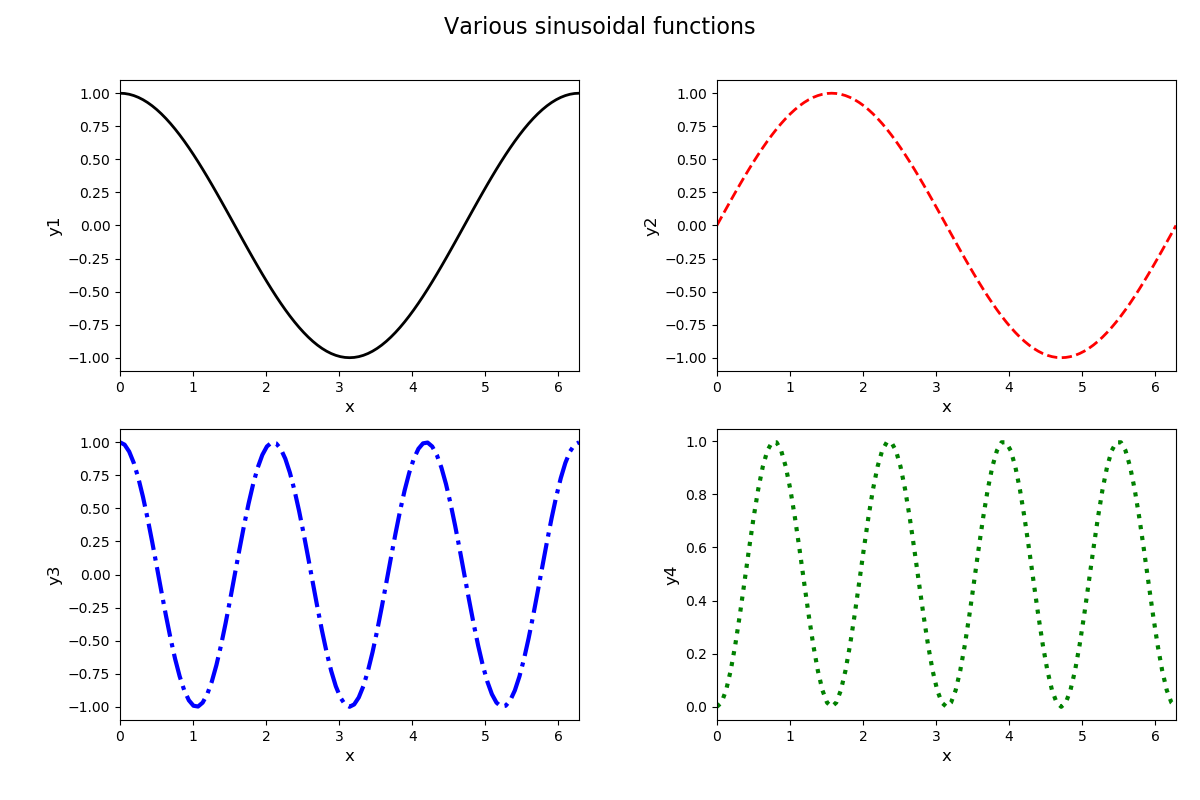

In [7]:
# create xgrid
xmin= 0
xmax=2*np.pi
xsteps = 101
x = np.linspace(xmin, xmax, xsteps)

# define some functions
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.cos(3*x)
y4 = np.sin(2*x)**2

# make a figure with multiple subplots
fig = plt.figure(figsize=(12,8))
fig.suptitle('Various sinusoidal functions', size=16)
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.9, hspace=0.2, wspace=0.3)

# plot function 1 on its own subplot
ax1 = fig.add_subplot(2,2,1)
ax1.plot(x, y1, color='black', linestyle='-', linewidth=2)
ax1.set_xlim(xmin, xmax)
ax1.set_xlabel('x',size=12)
ax1.set_ylabel('y1',size=12)

# plot function 2 on its own subplot
ax2 = fig.add_subplot(2,2,2)
ax2.plot(x, y2, color='red', linestyle='--', linewidth=2)
ax2.set_xlim(xmin, xmax)
ax2.set_xlabel('x',size=12)
ax2.set_ylabel('y2',size=12)

# plot function 3 on its own subplot
ax3 = fig.add_subplot(2,2,3)
ax3.plot(x, y3, color='blue', linestyle='-.', linewidth=3)
ax3.set_xlim(xmin, xmax)
ax3.set_xlabel('x',size=12)
ax3.set_ylabel('y3',size=12)

# plot function 4 on its own subplot
ax4 = fig.add_subplot(2,2,4)
ax4.plot(x, y4, color='green', linestyle=':', linewidth=3)
ax4.set_xlim(xmin, xmax)
ax4.set_xlabel('x',size=12)
ax4.set_ylabel('y4',size=12)

# save to file
file = 'multiplot.eps'
plt.savefig(folder + '/' + file)

### Customized linestyles

<IPython.core.display.Javascript object>


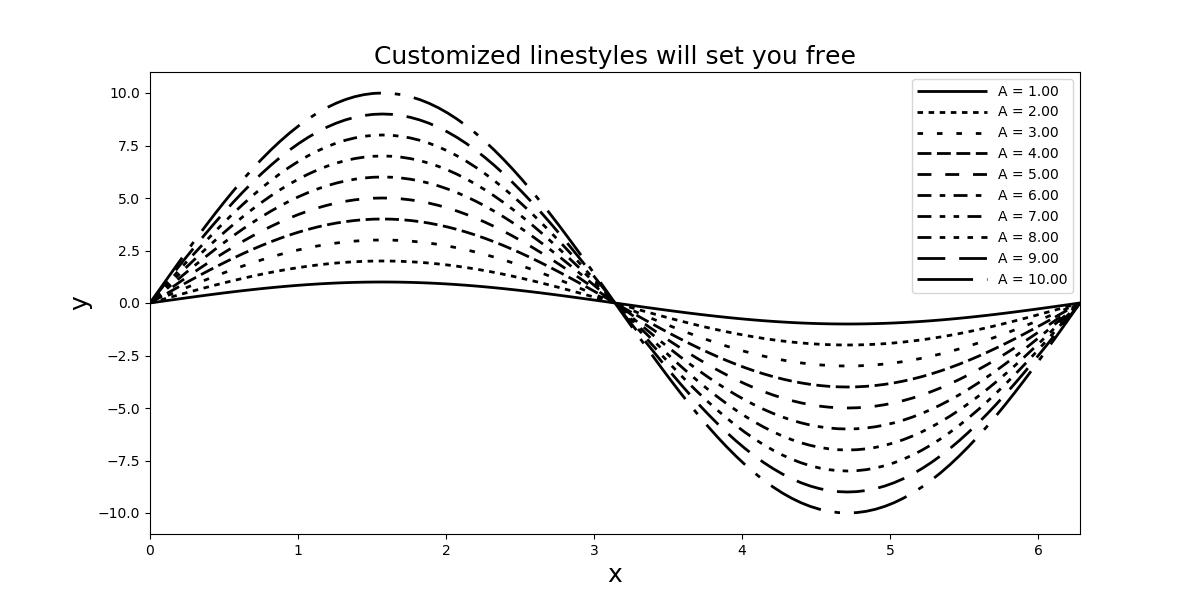

In [8]:
# create xgrid
xmin= 0
xmax=2*np.pi
xsteps = 101
x = np.linspace(xmin, xmax, xsteps)

# amplitudes
A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# plot multiple curves with customized linestyles
# use ls=(offset, onoffseq), where onoffseq=(on, off, on, off, ...)
plt.figure(figsize=(12,6))
plt.plot(x, A[0]*np.sin(x), 'k', ls=(0,()), lw=2, label='A = %.2f' % A[0])
plt.plot(x, A[1]*np.sin(x), 'k', ls=(0,(2, 2)), lw=2, label='A = %.2f' % A[1])
plt.plot(x, A[2]*np.sin(x), 'k', ls=(0,(2, 5)), lw=2, label='A = %.2f' % A[2])
plt.plot(x, A[3]*np.sin(x), 'k', ls=(0,(5, 2)), lw=2, label='A = %.2f' % A[3])
plt.plot(x, A[4]*np.sin(x), 'k', ls=(0,(5, 5)), lw=2, label='A = %.2f' % A[4])
plt.plot(x, A[5]*np.sin(x), 'k', ls=(0,(5, 3, 2, 3)), lw=2, label='A = %.2f' % A[5])
plt.plot(x, A[6]*np.sin(x), 'k', ls=(0,(5, 3, 2, 3, 2, 3)), lw=2, label='A = %.2f' % A[6])
plt.plot(x, A[7]*np.sin(x), 'k', ls=(0,(5, 3, 2, 3, 2, 3, 2, 3)), lw=2, label='A = %.2f' % A[7])
plt.plot(x, A[8]*np.sin(x), 'k', ls=(0,(10, 5)), lw=2, label='A = %.2f' % A[8])
plt.plot(x, A[9]*np.sin(x), 'k', ls=(0,(20, 5, 2, 5)), lw=2, label='A = %.2f' % A[9])
plt.xlim(xmin, xmax)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title('Customized linestyles will set you free', fontsize=18)
plt.legend(loc='upper right', handlelength=5)

# save to file
file = 'linestyles.eps'
plt.savefig(folder + '/' + file)

Non-interactive plotting.

In [9]:
%matplotlib inline

### Polar plot

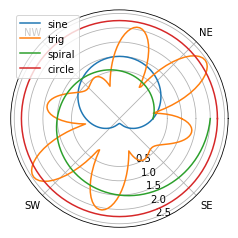

In [10]:
# create theta grid
theta = np.linspace(0,2*np.pi,201)

# define some polar functions
r1 = np.sin(theta)
r2 = np.abs(np.cos(5.0*theta) - 1.5*np.sin(3.0*theta))
r3 = theta/np.pi
r4 = 2.25*np.ones_like(theta)

# plot
plt.polar(theta,r1,label='sine')
plt.polar(theta,r2,label='trig')
plt.polar(theta,r3,label='spiral')
plt.polar(theta,r4,label='circle')
plt.thetagrids(np.arange(45,360,90),('NE','NW','SW','SE'))
plt.rgrids((0.5, 1.0, 1.5, 2.0, 2.5), angle=290)
plt.legend(loc='best')

# save to file
file = 'polar.eps'
plt.savefig(folder + '/' + file)

### Contour plot

The function `meshgrid` takes two 1-dimensional arrays and turns them into 2, 2-dimensional arrays whose matching indices will provide an easy to use set of arrays that can be evaluate 2-dimensional functions. The function `mgrid` returns the transpose of meshgrid. 

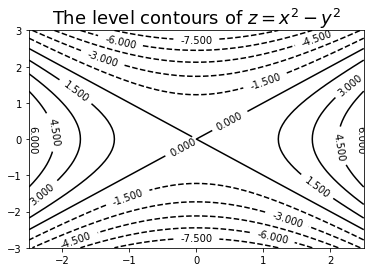

In [11]:
# create mesh grid
[X,Y] = np.mgrid[-2.5:2.5:51j, -3:3:61j]
Z = X*X - Y*Y

# plot
curves = plt.contour(X,Y,Z, 12, colors='k')
plt.clabel(curves)
plt.title(r'The level contours of $z=x^2-y^2$',size=18)

# save to file
file = 'contour.eps'
plt.savefig(folder + '/' + file)

### Filled contour plot

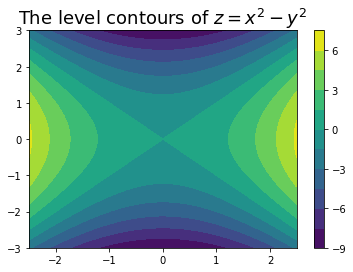

In [12]:
# create mesh grid
[X,Y] = np.mgrid[-2.5:2.5:51j, -3:3:61j]
Z = X*X - Y*Y

# plot
curves = plt.contourf(X,Y,Z, 12)
plt.colorbar()
plt.title(r'The level contours of $z=x^2-y^2$',size=18)

# save to file
file = 'contour_filled.eps'
plt.savefig(folder + '/' + file)

***
<a id=plotting_3d></a>
# <font color=brown> Plotting in 3D</font>

For 3D graphics, it is necessary to load the following package.

In [2]:
from mpl_toolkits.mplot3d import Axes3D

### Plots of surfaces

The alternative strategy to visualize z data is to draw a 'surface plot'. Use `axesname.plot_surface` to plot a surface corresponding to the z values. You will also need to import the 3D Axes function `Axes3D` to get the right projection. The following code imports necessary modules, creates x and y arrays and grids, generates z values corresponding to $z=f(x,y)=\sin(\sqrt{x^2+y^2})$, and plots a surface using the object-oriented approach:

C:\Users\PC\AppData\Local\Temp\ipykernel_9400\1787760539.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  new_axes = mynewfig.gca(projection='3d')


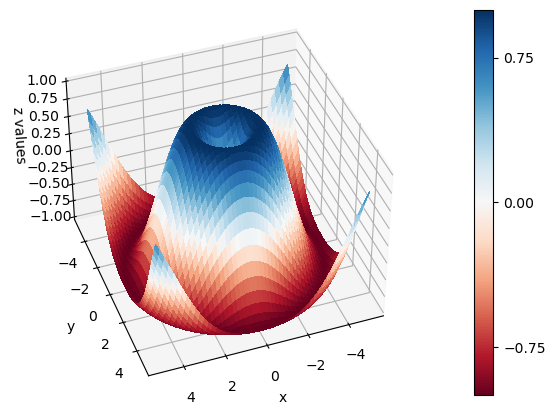

In [3]:
# same as before, define a figure with any name
mynewfig = plt.figure(figsize=(8,5))

# define an axis using gca, also set projection='3d' for isometric view
new_axes = mynewfig.gca(projection='3d')

# alternativel, this also works: new_ax = mynewfig.add_subplot(projection='3d')

x = np.arange(-5, 5, 0.05)
y = np.arange(-5, 5, 0.05)

# generate x and y grids
xgrid, ygrid = np.meshgrid(x,y)

# z=f(x,y)
z_value = np.sin(np.sqrt(xgrid**2 + ygrid**2))

# surface plot, change colormap to test other possibilities...
surf1=new_axes.plot_surface(xgrid,ygrid,z_value,antialiased=False,cmap='RdBu')

# set z limits
new_axes.set_zlim(-1, 1)

# labels
new_axes.set_xlabel('x')
new_axes.set_ylabel('y')
new_axes.set_zlabel('z values')

# you can control the width fraction occupoed by the colorbar,
# a 'padding' gap between the main axes and the colorbar (can be negative ...!),
# and the ticks that you want seen on the colorbar
mynewfig.colorbar(surf1,ax=new_axes,fraction=0.05,pad=0.1,ticks=[-0.75,0,0.75])

# change elevation and rotation angles (both from 0 to 360)
new_axes.view_init(40,70)
plt.show()

# comment the plt.show() above and uncomment the following line to save a jpg figure
# plt.savefig("filename.jpg",dpi=400)

Create 1D grids (independent variables). 

In [27]:
X = np.arange(-5, 5, 1.)
Y = np.arange(-5, 5, 1.)

In [28]:
X

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [29]:
Y

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

Create a mesh grid.

In [31]:
Y, X = np.meshgrid(X, Y)

In [18]:
X

array([[-5., -5., -5., -5., -5., -5., -5., -5., -5., -5.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-3., -3., -3., -3., -3., -3., -3., -3., -3., -3.],
       [-2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.]])

In [19]:
Y

array([[-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]])

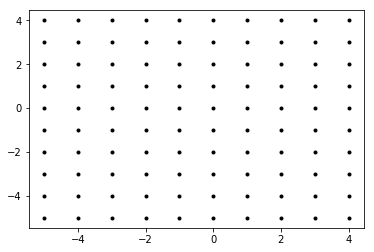

In [32]:
plt.plot(X,Y, marker='.', color='k', linestyle='none')

Defining a grid function.

In [20]:
R = np.sqrt(X*X + Y*Y)
Z = np.sin(R)
Z

array([[ 0.70886129,  0.11965158, -0.43697552, -0.7820949 , -0.92618484,
        -0.95892427, -0.92618484, -0.7820949 , -0.43697552,  0.11965158],
       [ 0.11965158, -0.58617619, -0.95892427, -0.9712778 , -0.83133918,
        -0.7568025 , -0.83133918, -0.9712778 , -0.95892427, -0.58617619],
       [-0.43697552, -0.95892427, -0.89168225, -0.44749175, -0.02068353,
         0.14112001, -0.02068353, -0.44749175, -0.89168225, -0.95892427],
       [-0.7820949 , -0.9712778 , -0.44749175,  0.30807174,  0.78674913,
         0.90929743,  0.78674913,  0.30807174, -0.44749175, -0.9712778 ],
       [-0.92618484, -0.83133918, -0.02068353,  0.78674913,  0.98776595,
         0.84147098,  0.98776595,  0.78674913, -0.02068353, -0.83133918],
       [-0.95892427, -0.7568025 ,  0.14112001,  0.90929743,  0.84147098,
         0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ],
       [-0.92618484, -0.83133918, -0.02068353,  0.78674913,  0.98776595,
         0.84147098,  0.98776595,  0.78674913

Plotting grid function as 2D surface. 

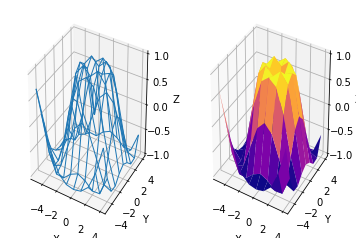

In [22]:
# create figure
fig = plt.figure()

# wireframe
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_wireframe(X, Y, Z, linewidth=1, rstride=1, cstride=1)
ax1.set_zlim(-1.01, 1.01)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# colormap
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='plasma', linewidth=0, rstride=1, cstride=1)
ax2.set_zlim(-1.01, 1.01)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# save to file
file = 'surface2D.eps'
plt.savefig(folder + '/' + file)

Finally, in many real problems, we do not have the z values in advance, but instead we measure or simulate z values for various points on a 2D surface. For example, the file temperature.csv contains the measured temperature of a 20 cm $\times$ 10 cm plate in comma separated values (csv) format, with data recorded at 1 mm resolution. To visualize this data, you would first load it using `np.loadtxt("filename.csv", delimiter=",")`. Then we can determine the size of the loaded array using the `shape` function:

In [7]:
temp_data=np.loadtxt("data/temperature.csv", delimiter=",")
temp_data.shape

(100, 200)

To create corresponding x and y arrays, use `np.linspace(start,end,nx)` and `np.linspace(start,end,nx)`, where `nx` and `ny` are the shape values. Note that `shape` returns the number of rows (or y locations) as the first number (100 here), and number of columns (or x locations) as the second number (200 here). These would correspond to `ny` and `nx`, respectively: the ORDER MATTERS for rectangular arrays! 

Once you have the (1D) arrays corresponding to x and y, create meshgrid arrays for both coordinates:

In [8]:
# determine number of rows and columns in dataset, rows first so ny first
ny,nx=temp_data.shape

# generate an x and y array for rows and columns (here between 0 and 2 cm for x, and between 0 and 1 cm for y)
xx=np.linspace(0,2,nx)
yy=np.linspace(0,1,ny)

# generate grid matrices for x and y
xgrid, ygrid = np.meshgrid(xx,yy)

Now we have an `xgrid` and `ygrid` matrices of the same size as `temp_data`. Then, generating the surface plot is identical to the example above (remember to import pyplot and Axes3D if you haven't yet):

C:\Users\PC\AppData\Local\Temp\ipykernel_9400\3797997955.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  mynewaxis = mynewfig.gca(projection='3d')


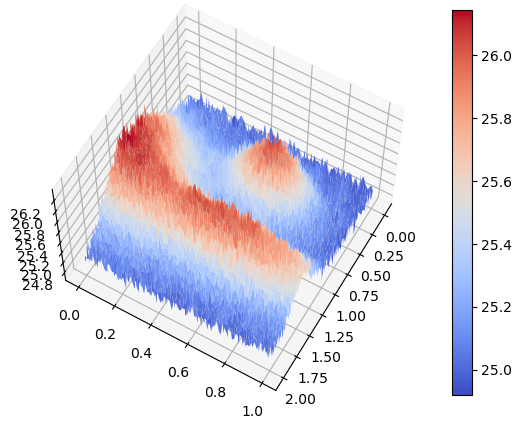

In [9]:
# same as before, define a figure with any name
mynewfig = plt.figure(figsize=(9,5))

# create an axis and surface plot and colorbar etc as necessary
mynewaxis = mynewfig.gca(projection='3d')
surf_data=mynewaxis.plot_surface(xgrid,ygrid,temp_data,cmap='coolwarm')

# colorbar is part of figure object (and axis object as the ax argument)
mynewfig.colorbar(surf_data,ax=mynewaxis)

# pick viewing angle, then show
mynewaxis.view_init(60,30)
plt.show()


Try viewing this dataset using pseudocolor or filled contours. Try playing around with different colormaps. 

***
<a id=proc_oop></a>
# <font color=brown> Procedural vs object-oriented plotting</font>

### Example 1 (procedural approach)

First off, lets plot a simple quadratic function $f(x) = x^2 + 2x + 3$.

<IPython.core.display.Javascript object>


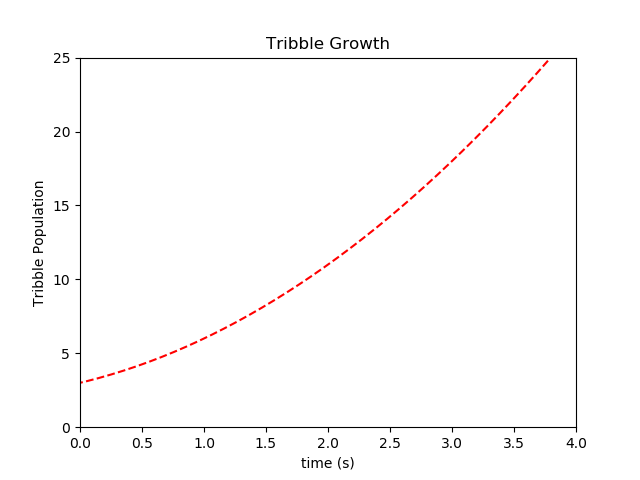

In [11]:
x = np.linspace(-5, 5, 100) # generate 100 points between -5 and 5 (these will be on x-axis)
y = x**2 + 2 * x + 3 # values of quadratic function in particular points generated above 
plt.plot(x, y, 'r--')
plt.xlabel("time (s)")
plt.ylabel("Tribble Population")
plt.title("Tribble Growth")
plt.xlim([0, 4])
plt.ylim([0, 25])
plt.show()

### Example 1 (object-oriented approach)

A much better way to "build" plots is to use a more object-oriented approach. In this case, we create the objects and manipulate them which allows us to have more control over how we create plots. Here we will create the annotated plots so that we have examples on how to do the same things (notice that they are very similar). The basic premise of this approach is that you generate objects that can be manipulated and remain persistent.

<IPython.core.display.Javascript object>


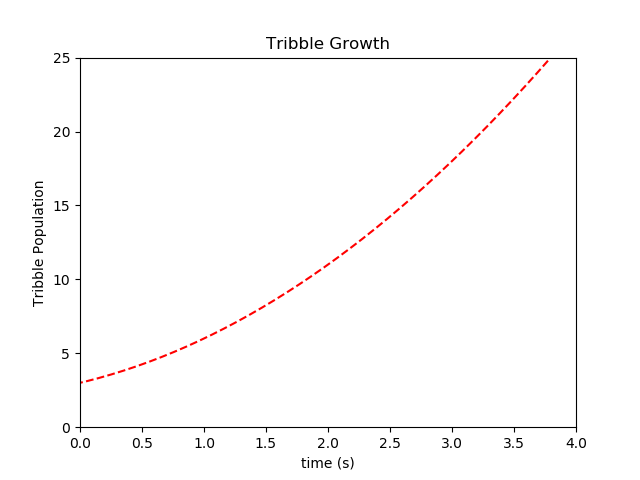

(0, 25)

In [28]:
x = np.linspace(-5, 5, 100)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
growth_curve = axes.plot(x, x**2 + 2 * x + 3, 'r--')
axes.set_xlabel("time (s)")
axes.set_ylabel("Tribble Population")
axes.set_title("Tribble Growth")
axes.set_xlim([0, 4])
axes.set_ylim([0, 25])

### Example 2 (procedural approach)

In [33]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
X, Y

(array([[-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
          0.97979798,  1.        ],
        [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
          0.97979798,  1.        ],
        [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
          0.97979798,  1.        ],
        ...,
        [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
          0.97979798,  1.        ],
        [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
          0.97979798,  1.        ],
        [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
          0.97979798,  1.        ]]),
 array([[-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-0.97979798, -0.97979798, -0.97979798, ..., -0.97979798,
         -0.97979798, -0.97979798],
        [-0.95959596, -0.95959596, -0.95959596, ..., -0.95959596,
         -0.95959596, -0.95959596],
        ...,
        [ 0.95959596,  0.95959596,  0.95959596, ...,  

In [42]:
F = np.sin(X**2) + np.cos(Y**2)

I highly suggest looking at [this explanation of how to choose a colormap](http://matplotlib.org/users/colormaps.html) if you are interested.

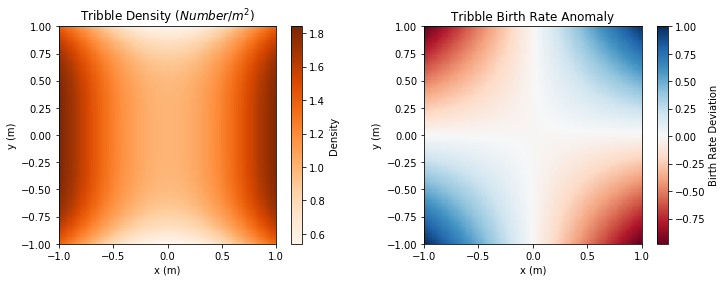

In [43]:
color_map = plt.get_cmap("Oranges")
plt.gcf().set_figwidth(plt.gcf().get_figwidth() * 2) 
plt.subplot(1, 2, 1, aspect="equal")
plt.pcolor(X, Y, F, cmap=color_map)
plt.colorbar(label="Density")

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Tribble Density ($Number/m^2$)")

plt.subplot(1, 2, 2, aspect="equal")
plt.pcolor(X, Y, X*Y, cmap=plt.get_cmap("RdBu"))
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Tribble Birth Rate Anomaly")
plt.colorbar(label="Birth Rate Deviation")

plt.autoscale(enable=True, tight=False)
plt.show()

### Example 2 (object oriented approach)

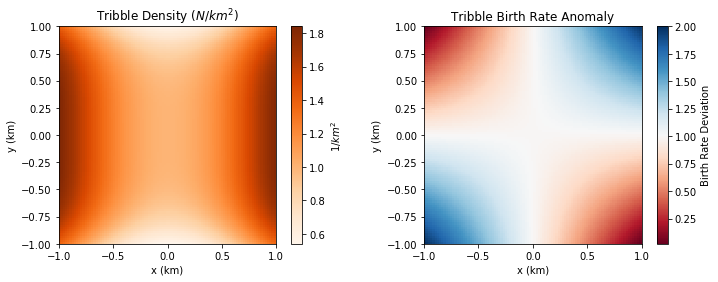

In [44]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 1, aspect='equal')
tribble_density = axes.pcolor(X, Y, np.sin(X**2) + np.cos(Y**2), cmap=plt.get_cmap("Oranges"))
axes.set_xlabel("x (km)")
axes.set_ylabel("y (km)")
axes.set_title("Tribble Density ($N/km^2$)")
cbar = fig.colorbar(tribble_density, ax=axes)
cbar.set_label("$1/km^2$")

axes = fig.add_subplot(1, 2, 2, aspect='equal')
klingon_population_density = axes.pcolor(X, Y, X * Y + 1, cmap=plt.get_cmap("RdBu"))
axes.set_xlabel("x (km)")
axes.set_ylabel("y (km)")
axes.set_title("Tribble Birth Rate Anomaly")
cbar = fig.colorbar(klingon_population_density, ax=axes)
cbar.set_label("Birth Rate Deviation")

plt.show()

***
<a id=references></a>
# <font color=brown> References</font>

* This tutorial was created with the help of official [Matplotlib tutorial](https://matplotlib.org/tutorials/index.html) and also thanks to [Eric West](https://github.com/EricJWest/), [Kyle T. Mandli](https://github.com/mandli/). 